# Kings County House Sales Analysis


**Authors:** Maureen Kitang'a, Samuel Kyalo, Priscila Kamiri, Leo Kariuki, Jimcollins Wamae & Steve Githinji
***

## Business Understanding
### Overview

Real estate developers in King County, Washington are interested in identifying factors that influence the sale price of homes in King County, as well as developing models to predict the sale price of homes based on these factors. To address this challenge, we undertook a data science project to develop a model that could accurately predict the sale price of homes in the region.

Our analysis involved the examination of over 21,000 house sale transactions that occurred between May 2014 and May 2015. Using advanced machine learning techniques, we developed a progression of multiple models that outperformed the baseline model we initially used.  These models allowed us to identify the key features that drive property prices, including location, size, condition, and various other factors. This information can be used to optimize the design and marketing of new properties, identify investment opportunities, and make data-driven decisions about the development and sale of properties.
***

### Business Problem

The real estate developers in King County, Washington are facing a significant challenge in identifying the key factors that influence the sale of houses in the region. The developers need to identify these features that affect its sale price to make informed investment decisions and improve their construction process from start to finish. However, identifying this is a challenging task due to the large volume of data to be analyzed, including interdependent and correlated variables. Therefore, data science modeling techniques such as feature engineering and regression analysis are necessary to identify the most influential factors that drive property prices.

By leveraging these insights, the developers can improve their construction process and build homes that are more attractive to buyers, leading to increased sales and profits. Additionally, the insights can help developers understand the competitive landscape of the market, identify emerging trends and opportunities, and develop more effective marketing strategies to improve sales further. Ultimately, our work will contribute to the growth and development of the region's real estate market, leading to economic growth in the area.


***

### Problem Questions

* How does the size and quality of the property influence the sale price of homes in King County?
* How does the house neighborhood/location affect the prices?
* How accurately can we predict the sale price of homes in King County based on the available features?


## Data Undestanding

The King County House Sales dataset contains information on over 21,000 home sales in King County, Washington, USA between May 2014 and May 2015. The dataset includes a variety of features such as the number of bedrooms and bathrooms, the size of the property, the location of the property, and various other attributes that may influence the sale price of a home.

We began by importing the relevant libraries and set the appropriate alias for each. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

import plotly.express as px

%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

Read in the data from King County House Sales from a file named `kc_house_data.csv` and store it as a DataFrame named `data`. Preview the Dataframe to ensure it was loaded correctly.

In [2]:
#Loading the data
data = pd.read_csv('data/kc_house_data.csv')

#Preview of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Defined a function to get a quick overview of the dataset such as column names, datatypes.

In [3]:
# Dataset overview
def get_dataframe_info(df):
    
    print("Number of rows:", df.shape[0])
    print("Number of columns:" ,df.shape[1])
    print("\nData types:")
    print(df.dtypes)
    print("\nSummary Statistics:")
    print(df.describe())

get_dataframe_info(data)

Number of rows: 21597
Number of columns: 21

Data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    37

## Data Preparation
Preparation of the data involved answering the following questions:
* Does this data contain missing values?
* Are there any outliers?
* Does this data contain any duplicates? 
* Are the values in the expected datatype?
* What is the correlation between various features?
* Do the categorical values require One-Hot encoding?
* Does the dataset require any transformation?

### Missing Values
Check the columns for missing values.

In [4]:
# Checking for missing values
def check_missing_values(df):
    """
    This function takes a pandas DataFrame as input and returns a dictionary with the column names as keys
    and the number of missing values in each column as values.
    """
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0].sort_values(ascending=False)
check_missing_values(data)

yr_renovated    3842
waterfront      2376
view              63
dtype: int64

### Duplicates
A function was created that takes in a dataset and returns count of duplicate rows as True and count of non-duplicate rows as False.

In [5]:
# Create a function that checks for duplicates values
def check_duplicates(column):
    return column.duplicated().value_counts()
check_duplicates(data)

False    21597
dtype: int64

### Missing Values


The `waterfront` column is a categorical column. The column has 2 unique values, 'YES' and 'NO' with 2376 missing values. As this is a fairly number of the total records, we shall be replacing the missing values with the mode of the column. The mode of the column is 'NO'. Therefore, we shall be replacing the missing values with 'NO'.


In [6]:
# Fill the missing values with the mode of the column(waterfront)
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode()[0])

The `view` column is a categorical column. With 63 missing values. As this is a small number of the total records, we shall be replacing  the records with mode,in this case 'NONE'.

In [7]:
# Fill the missing values with the mode of the column(view)
data['view'] = data['view'].fillna(data['view'].mode()[0])

The `yr renovated` column is a numerical column with 3842 missing values. Futhermore, majority of the data in the records were zero. This could either be suggesting that the homes have never been renovated or that the data is erroneous. As there is no ideal way of dealing with these values, it would be best to drop the entire column.

In [8]:
# Drop the yr_renovated column
data = data.drop(['yr_renovated'], axis=1)

### Invalid Data

The `sqft_basement` column contains some rows with **?** as a value. We replace this with **0.0**.

In [9]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

data['sqft_basement'] = data["sqft_basement"].replace({"?": '0.0'})
data['sqft_basement'] = data['sqft_basement'].astype(float)

The `date` column has a wrong datatype. So we converted it to **datetime** datatype

In [10]:
# Convert the date column to datetime data type
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  zipcode        2159

## Univariate Analysis

In this section, we'll explore each column in the dataset to see the distributions of features. The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

#### Categorical Columns

There are 5 Categorical Columns in the dataset that we shall be analysing:

- `waterfront`

- `view`

- `condition`

- `grade`

- `zipcode`

In [11]:
# Function to visualise the data in the columns
def plot_data(df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    df[col].value_counts().plot(kind='bar', figsize=(10, 5), edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0)

##### Waterfront
The `waterfront` column shows the house has a waterfront or not.

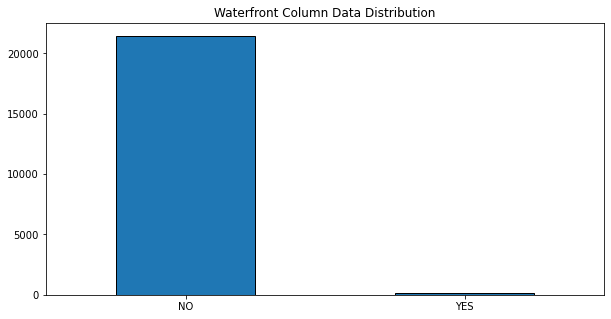

In [12]:
# Visualise the data distribution
plot_data(data, 'waterfront', 'Waterfront Column Data Distribution')  

The distribution above shows that most of the houses in the dataset are not on a waterfront.

##### The view
The `view` shows whether a house has a view or not, and if it has, what quality of view.

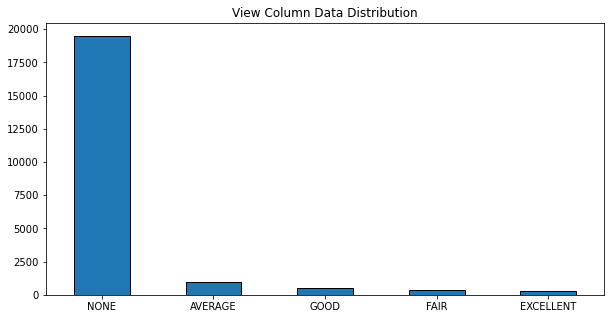

In [13]:
# Visualise the data distribution
plot_data(data, 'view', 'View Column Data Distribution')  

In the distribution above, we see that majority of the houses in the dataset don't have a view. Very few houses have an excellent view.

##### Condition
The condition column identifies the condition of the house.

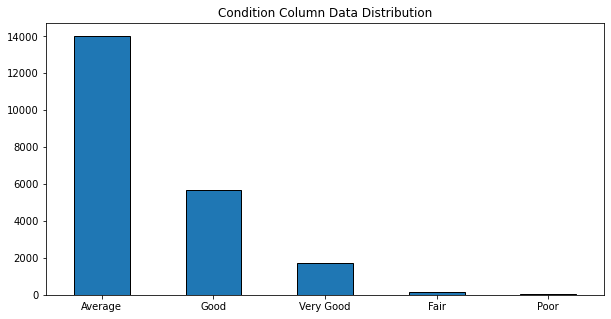

In [14]:
# Visualise the data distribution
plot_data(data, 'condition', 'Condition Column Data Distribution')

From the distribution above, we can see that most of the houses in the dataset are in average condition. The number of houses in **average** condition is nearly 14,000. The number of houses in **good** condition is nearly 6,000. The number of houses in **very good** condition is nearly 2,000.The number of houses in **fair** condition and **poor** condition are way below 2,000.

#####  Grade
The grade column identifies the quality of construction and design of the house. The grade represents the construction quality of improvements. Grades run from grade 1 to 13.

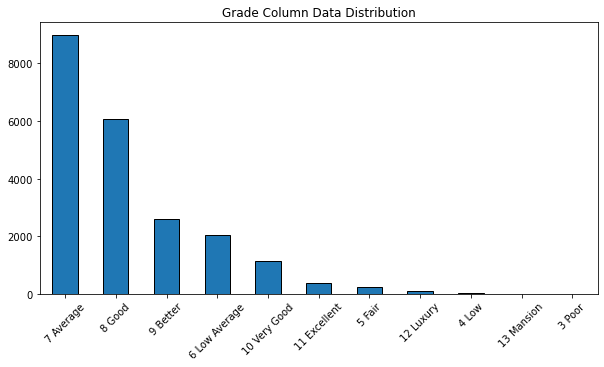

In [15]:
# Visualise the data distribution
plot_data(data, 'grade', 'Grade Column Data Distribution')
plt.xticks(rotation=45);

From the distribution above, we see that the houses in this dataset range from grades 3-13. The column is however not evenly distributed as we can see majority of the houses with a grade of 7 (Average), and 8 (Good).

##### Zipcode
The zipcode column identifies the zipcode area the house is in.

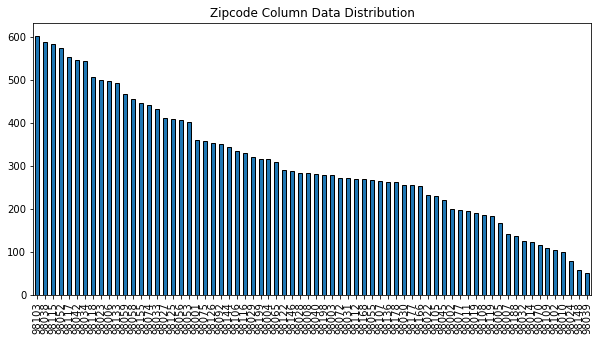

In [16]:
# Visualise the data distribution
plot_data(data, 'zipcode', 'Zipcode Column Data Distribution')
plt.xticks(rotation=90);

From the distribution above, we see that the zipcode with the most houses is 98103. The zipcode with the least houses is 98039. Unlike the other categorical columns, we see more evenly distributed data in this column.

#### Numeric Columns
There are 11 Numerical Columns in the dataset that we shall be analysing:

- `price`
  
- `bedrooms`
  
- `bathrooms`
  
- `sqft_living`
  
- `sqft_lot`

- `floors`
  
- `sqft_above`
  
- `sqft_basement`
  
- `yr_built`

- `lat`

- `long`

In [17]:
# Function to visualise the distribution of numerical columns
def plot_distribution(df, col, bins):
    """
    Plot the distribution of a numeric column in a pandas DataFrame.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the column to plot.
        column (str): The name of the column to plot.

    Returns:
        None
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=col, bins=bins, edgecolor='black', kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()


##### Price
The price column identifies the price of the house.

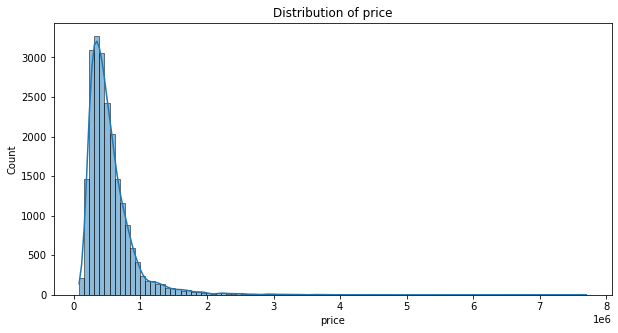

In [18]:
# Visualise the data distribution
plot_distribution(data, 'price', 100)

From the distribution above, we see that the price column is skewed to the right. The maximum price of a house in the dataset is 7,700,000 and the minimum price of a house in the dataset is 78,000.

##### Bedrooms
The bedrooms column identifies the number of bedrooms in the house. 

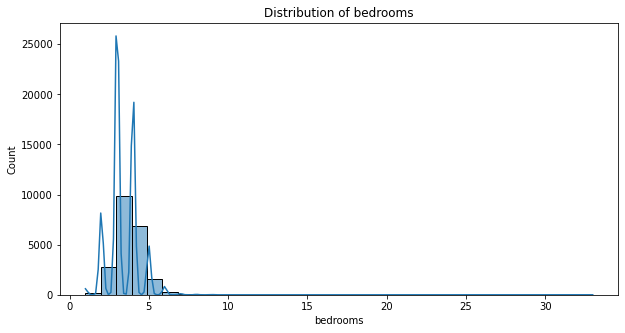

In [19]:
# Visualise the data distribution
plot_distribution(data, 'bedrooms',33)

The bedroom column distribution is skewed with most houses having less than five bedrooms.The most common number of bedrooms is 3. The minimum number of bedrooms in a house in the dataset is 1, and the maximum number of bedrooms in a house in the dataset is 33.

In [20]:
# Drop values above 9
data = data[~data['bedrooms'].between(10, 33)]

In [21]:

data['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
7      38
8      13
9       6
Name: bedrooms, dtype: int64

##### Bathrooms
The bathrooms column identifies the number of bathrooms in the house.

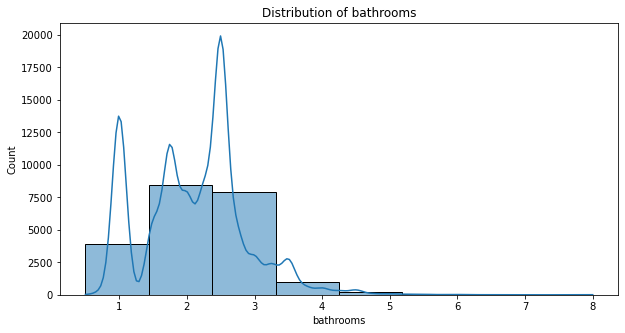

In [22]:
# Visualise the data distribution
plot_distribution(data, 'bathrooms', 8)

From the distribution above we can see that the bathroom column is not skewed. The minimum number of bathrooms in a house in the dataset is 0.5, and the maximum number of bathrooms in a house in the dataset is 8. The most common number of bathrooms in a house in the dataset is 2.

#### Sqft Living
> The sqft living column identifies the square footage of the house.

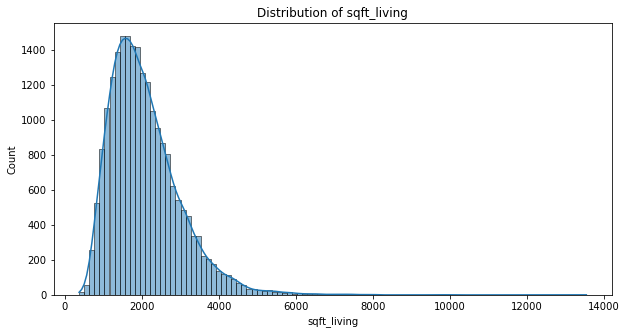

In [23]:
# Visualise the data distribution
plot_distribution(data, 'sqft_living', 100)

From the distribution above, we can see that the sqft living column is skewed to the right. This means that the mean square footage of the homes is greater than the median. The minimum square footage of a house in the dataset is 370, and the maximum square footage of a house in the dataset is 13,540. The mean square footage of a house in the dataset is 2080.

##### Sqft Lot
> The `sqft lot` column identifies the square footage of the lot.

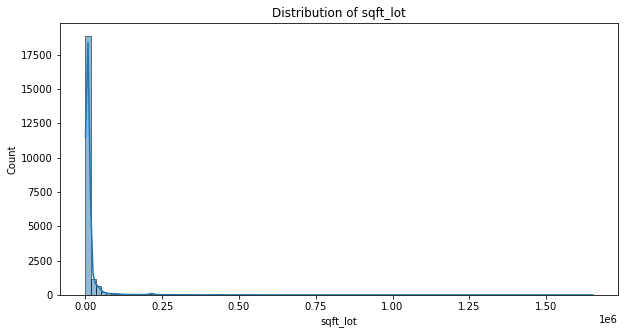

In [24]:
# Visualise the data distribution
plot_distribution(data, 'sqft_lot', 100)

From the distribution above, we can see that the data is skewed to the right. This is because the mean is greater than the median. The minimum lot square footage is 520, the maximium lot square footage is 1,651,359.

##### Floors
> `floors` column identifies the number of floors in the house.

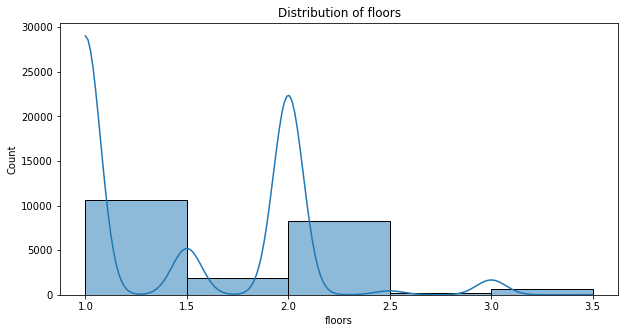

In [25]:
# Visualise the data distribution
plot_distribution(data, 'floors', 5)

From the distributions above, majority of the homes in the data set have 1 floor. The minimum number of floors in a house is 1, and the maximum number of floors in a house is 3.5. 

In [26]:
data['floors'].value_counts()

1.0    10671
2.0     8232
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

##### Sqft Above
> The `sqft above` column identifies the square footage of the house above the ground.

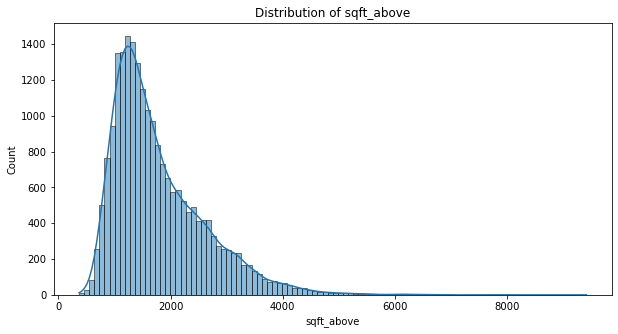

In [27]:
# Visualise the data distribution
plot_distribution(data, 'sqft_above',100)

From the distribution above, the data is skewed to the right. This means that mean of sqft_above is greater than the median. The minimum is 370sqft and the maximum is 9410sqft.

#### Sqft Basement
> The `sqft basement` column identifies the square footage of the basement of the house.

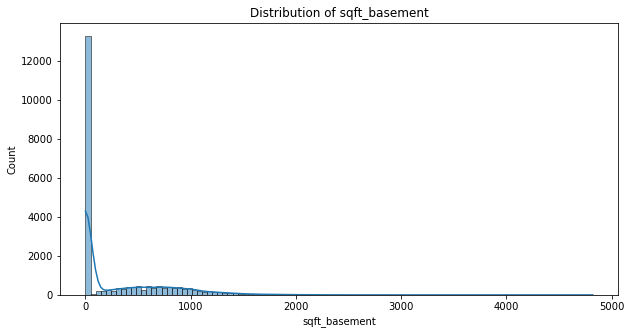

In [28]:
# Visualise the data distribution
plot_distribution(data, 'sqft_basement', 100)

From the distribution above, the data is not clearly distributed with most houses having no basement.

##### Yr Built
> The `yr built` column identifies the year the house was built.

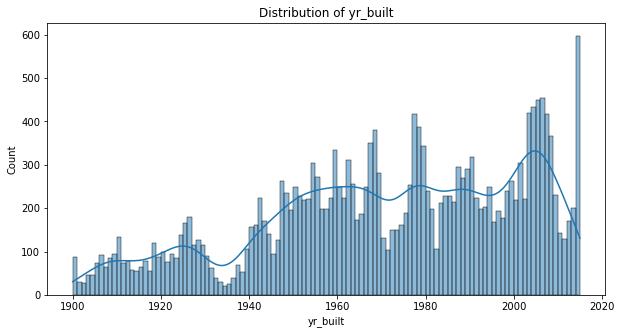

In [29]:
# Visualise the data distribution
plot_distribution(data, 'yr_built', 115)

From the distributions above we can see that the the oldest house in the dataset was built in 1900, and the newest house in the dataset was built in 2015. The mean year the houses in the dataset were built is 1971.

#### Sqft Living15
> The `sqft living15` square footage of interior housing living space for the nearest 15 neighbors

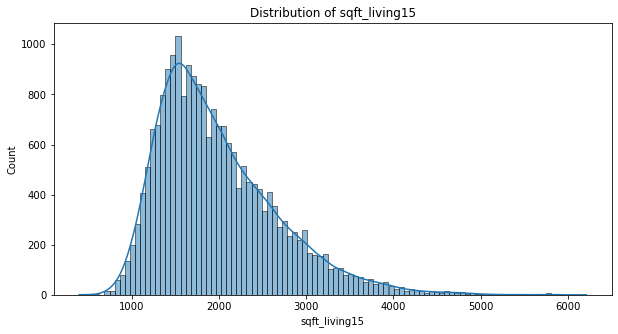

In [30]:
# Visualise the data distribution
plot_distribution(data, 'sqft_living15', 100)

From the distribution plot, we can see that the data is skewed to the right. This means that the mean value is greater than the median. The minimum value of the nearest 15 neighbors is 399sqft, and the maximum  of the nearest 15 neighbors is 6,210sqft. The mean of the nearest 15 neighbors is 1987sqft.

##### Sqft Lot15
> The `sqft lot15` column represents the square footage of the land lots for the nearest 15 neighbors.

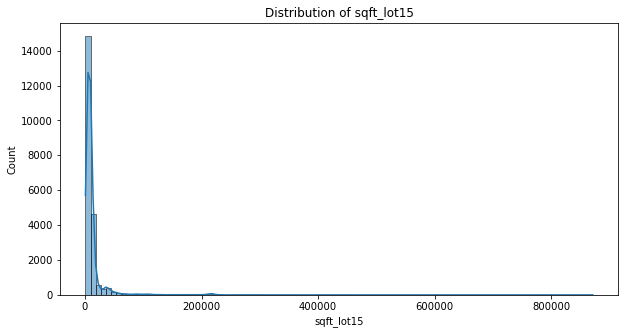

In [31]:
# Visualise the data distribution
plot_distribution(data, 'sqft_lot15', 100)

From the distribution plot, data is skewed to the right. The minimum value of the nearest 15 neighbors is 651sqft, and the maximum value of the nearest 15 neighbors is 871,200ft. The mean value of the nearest 15 neighbors is 12758sqft.

##### Lat & Long
> The `lat` column identifies the latitude of the house. The `long` column identifies the longitude of the house.

In [32]:
# create a mapbox scatter plot that shows the location of the houses
fig = px.scatter_mapbox(
    data,  # DataFrame
    lat='lat',
    lon='long',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price',
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Linear Transformations

We converted sq_ft units of area to sq_m to make the output more interpretable to our stakeholders.

In [33]:
# Function to convert sq_ft to sq_m
def convert_sqft_to_sqm(df, columns):
    # Define a conversion factor from sqft to sqm
    sqft_to_sqm = 0.092903

    # Loop through the specified columns and convert the values to sqm
    for column in columns:
        df[column] = df[column] * sqft_to_sqm

    return df

In [34]:
# Use function to convert sq_ft to sq_m
data = convert_sqft_to_sqm(data, ['sqft_living15', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living'])

In [35]:
def rename_columns(df):
    # Renaming columns using dictionary of old name -> new name
    df = df.rename(columns={
        'sqft_living': 'sqm_living',
        'sqft_lot': 'sqm_lot',
        'sqft_above': 'sqm_above',
        'sqft_basement': 'sqm_basement',
        'sqft_living15': 'sqm_living15',
        'sqft_lot15': 'sqm_lot15'
    })
    return df

In [36]:

data = rename_columns(data)

In [37]:
#preview of the last few rows
data.tail()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,zipcode,lat,long,sqm_living15,sqm_lot15
21592,263000018,2014-05-21,360000.0,3,2.50,142.14159,105.073293,3.0,NO,NONE,Average,8 Good,142.14159,0.0,2009,98103,47.6993,-122.346,142.14159,140.190627
21593,6600060120,2015-02-23,400000.0,4,2.50,214.60593,540.045139,2.0,NO,NONE,Average,8 Good,214.60593,0.0,2014,98146,47.5107,-122.362,170.01249,668.901600
21594,1523300141,2014-06-23,402101.0,2,0.75,94.76106,125.419050,2.0,NO,NONE,Average,7 Average,94.76106,0.0,2009,98144,47.5944,-122.299,94.76106,186.456321
21595,291310100,2015-01-16,400000.0,3,2.50,148.64480,221.852364,2.0,NO,NONE,Average,8 Good,148.64480,0.0,2004,98027,47.5345,-122.069,130.99323,119.566161
21596,1523300157,2014-10-15,325000.0,2,0.75,94.76106,99.963628,2.0,NO,NONE,Average,7 Average,94.76106,0.0,2008,98144,47.5941,-122.299,94.76106,126.069371


### Correlation Matrix

A correlation matrix was created to visualize the correlations between the different features. A higher figure describes a higher correlation

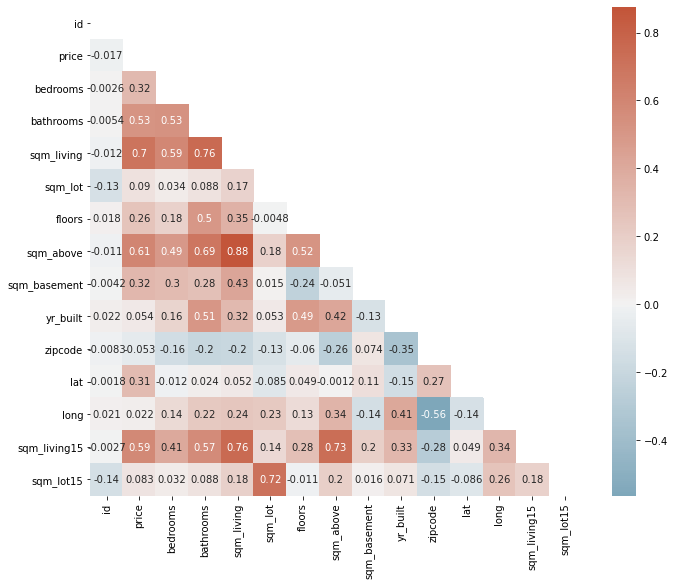

In [38]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), mask = mask, annot=True, center=0);

Based on the correlation matrix generated from the dataset, we can see that the most strongly correlated feature with the target column `price` is `sqft_living` with a correlation coefficient of `0.7`. This suggests that there is a strong positive linear relationship between the living area of a house and its price. Houses with larger living areas are likely to have higher prices than those with smaller living areas.

# Data Modelling

In this section, we shall use Regression technique.
Regression is a statistical method used to estimate the relationship between a dependent variable and one or more independent variables. The goal of regression analysis is to model the relationship between the variables and to use the model to make predictions or to understand the underlying factors that affect the dependent variable. In this case we are trying to estimate the effect that the different features of the homes has on our dependent variable, the price of the homes.

Furthermore, as we are working with multiple features, we will be using multiple linear regression. Multiple linear regression is a regression algorithm that is used to predict the value of a dependent variable based on the value of multiple independent variables (unlike simple linear regression which only uses one independent variable). 

### Simple Linear Regression


We will use simple linear regression as our baseline model. The regression will be between two variables , the sale price as the dependent variable and the size of living space(sqm) in the home as the independent variable in our model.

In [39]:
corr = data.corr()['price'].sort_values(ascending=False)
corr

price           1.000000
sqm_living      0.701929
sqm_above       0.605396
sqm_living15    0.585250
bathrooms       0.525860
sqm_basement    0.320931
bedrooms        0.316939
lat             0.306686
floors          0.256904
sqm_lot         0.089898
sqm_lot15       0.082866
yr_built        0.053914
long            0.022000
id             -0.016690
zipcode        -0.053299
Name: price, dtype: float64

We see that the `sqm_living` column has the highest correlation with the `price` column. This is expected since the size of the house is a major factor in determining the price of the house. Let's create a scatter plot to determine the relationship between the `sqm_living` and `price` is linear.

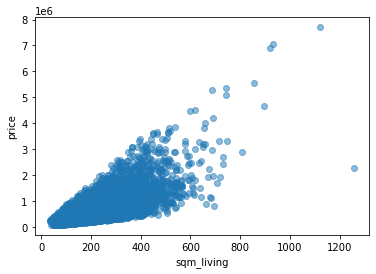

In [40]:
# Plot a scatter plot of 'Price' against 'sqft_living'
plt.scatter(data['sqm_living'],data['price'], alpha=0.5)
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.show()

In [41]:
# Assigning values of the variables
X = data[['sqm_living']]
y = data['price']

From the scatter plot we identified that the relationship is linear

In [42]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:29:24   Log-Likelihood:            -2.9999e+05
No. Observations:               21592   AIC:                         6.000e+05
Df Residuals:                   21590   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.41e+04   4410.853     -9.998      0.0

In [43]:
# calculate the mean absolute error of our baseline model
y_pred = baseline_results.predict(sm.add_constant(X))
baseline_mae = mean_absolute_error(y, y_pred)
baseline_mae

173829.54414048957

We want to minimize the difference between the predicted and actual prices, and MAE provides a good measure of how well the model is performing.

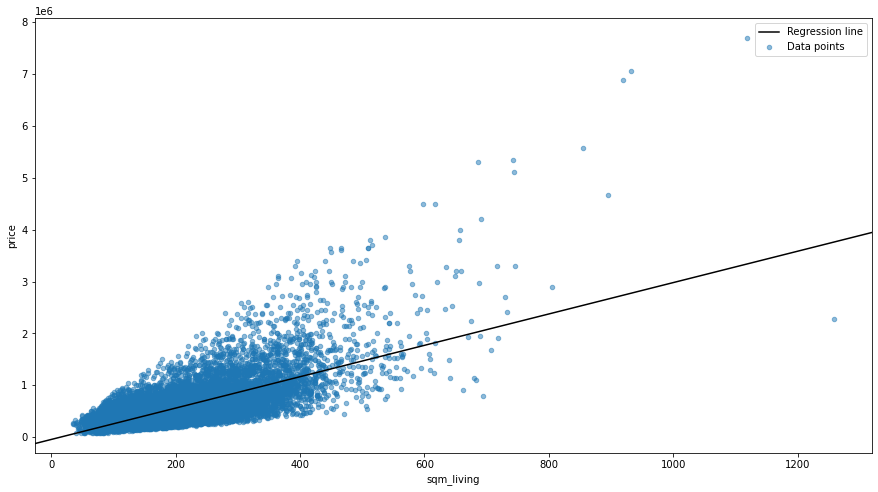

In [44]:
# Plot partial regression plot for the feature
fig, ax = plt.subplots(figsize=(15,8))
data.plot.scatter(x="sqm_living", y="price", label="Data points", alpha=0.5 ,ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

### Baseline Model Evaluation and Interpretation

The baseline model is statistically significant overall, and explains about 49.2% of the variance in price. The model is off by about $173,829

The coefficients for the intercept, `sqm_living` is statistically significant.

* Every increase of 1 in Square meters of living space in the home is associated with an increase of $3023 in the Sale price .

The model is statistically significant except it only explains about 49% variance of our target. However we target to achieve `R-squared` of about 70% and a lower mean absolute error. This informed our decision to build another model.

### Multiple Linear Regression Model

> We will now iterate the baseline model by building a multiple linear regression model that will have more than one independent variable.

We will start by creating a new dataframe that will contain all of the features that we want to have in our model.  In order to know which variables to keep in our model, we will first look at a correlation matrix. This is done in order to reduce multicollinearity. Multicollinearity is a situation in which two or more independent variables are highly correlated. This can cause problems in the model as it can lead to unstable estimates of the regression coefficients. Therefore, we will be removing the variables that are highly correlated with each other.

In [45]:
# Declare X_iterated variables
X_all = data[['bedrooms', 'bathrooms','sqm_living','sqm_living15', 'sqm_lot','floors', 
              'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built']]

# Preview the X_iterated dataframe
pd.DataFrame(X_all).head()

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,view,condition,grade,sqm_above,sqm_basement,yr_built
0,3,1.00,109.62554,124.49002,524.901950,1.0,NONE,Average,7 Average,109.62554,0.00000,1955
1,3,2.25,238.76071,157.00607,672.803526,2.0,NONE,Average,7 Average,201.59951,37.16120,1951
2,2,1.00,71.53531,252.69616,929.030000,1.0,NONE,Average,6 Low Average,71.53531,0.00000,1933
3,4,3.00,182.08988,126.34808,464.515000,1.0,NONE,Very Good,7 Average,97.54815,84.54173,1965
4,3,2.00,156.07704,167.22540,750.656240,1.0,NONE,Average,8 Good,156.07704,0.00000,1987


#### Ordinal Encoding

>Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

Using the official [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), we were able to understand that the values in the `condition` and `grade` columns are ordinal, and have been assigned a value based on the quality of the feature. Therefore, we will be ordinal encoding these columns.

In [46]:
# Create dictionaries for mapping the  numerical valueS
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, 
              '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}


X_all['condition'] = X_all['condition'].map(condition_dict)
X_all['grade'] = X_all['grade'].map(grade_dict)

# Preview the dataframe
X_all.head()

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,view,condition,grade,sqm_above,sqm_basement,yr_built
0,3,1.00,109.62554,124.49002,524.901950,1.0,NONE,3,7,109.62554,0.00000,1955
1,3,2.25,238.76071,157.00607,672.803526,2.0,NONE,3,7,201.59951,37.16120,1951
2,2,1.00,71.53531,252.69616,929.030000,1.0,NONE,3,6,71.53531,0.00000,1933
3,4,3.00,182.08988,126.34808,464.515000,1.0,NONE,5,7,97.54815,84.54173,1965
4,3,2.00,156.07704,167.22540,750.656240,1.0,NONE,3,8,156.07704,0.00000,1987


#### One Hot Encoding
In order to use a categorical variable in our model, we'll create multiple dummy variables, one for each category of the categorical variable.

In [47]:
#Encoding the categorical columns
X_all = pd.get_dummies(X_all, columns=['view'], drop_first=False)
#Preview the dataframe
X_all

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,condition,grade,sqm_above,sqm_basement,yr_built,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,3,1.00,109.62554,124.49002,524.901950,1.0,3,7,109.62554,0.00000,1955,0,0,0,0,1
1,3,2.25,238.76071,157.00607,672.803526,2.0,3,7,201.59951,37.16120,1951,0,0,0,0,1
2,2,1.00,71.53531,252.69616,929.030000,1.0,3,6,71.53531,0.00000,1933,0,0,0,0,1
3,4,3.00,182.08988,126.34808,464.515000,1.0,5,7,97.54815,84.54173,1965,0,0,0,0,1
4,3,2.00,156.07704,167.22540,750.656240,1.0,3,8,156.07704,0.00000,1987,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,142.14159,142.14159,105.073293,3.0,3,8,142.14159,0.00000,2009,0,0,0,0,1
21593,4,2.50,214.60593,170.01249,540.045139,2.0,3,8,214.60593,0.00000,2014,0,0,0,0,1
21594,2,0.75,94.76106,94.76106,125.419050,2.0,3,7,94.76106,0.00000,2009,0,0,0,0,1
21595,3,2.50,148.64480,130.99323,221.852364,2.0,3,8,148.64480,0.00000,2004,0,0,0,0,1


In the `view` column, we shall be dropping the `NONE` column as the reference column. This will allow us to determine if having a waterfront has any effect on property value

In [48]:
X_all = X_all.drop(['view_NONE'], axis=1)
X_all.columns

Index(['bedrooms', 'bathrooms', 'sqm_living', 'sqm_living15', 'sqm_lot',
       'floors', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD'],
      dtype='object')

##### Check for MultiCollinearity

In [49]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=X_all.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [50]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqm_above, sqm_living)",0.876504
"(grade, sqm_living)",0.762978
"(sqm_living, sqm_living15)",0.756551
"(sqm_above, grade)",0.756183
"(sqm_living, bathrooms)",0.755697


Using .75 as a cutoff, (sqm_living, sqm_above) and (sqm_living15, sqm_living) are highly correlated with correlation coefficients of 0.856068 and 0.758043, respectively. We are going to retain `sqm_living` since the rest have a lower correlation with the target variable(price)

In [51]:
X_all.drop(['sqm_above','sqm_living15'], axis=1, inplace=True)

In [52]:
iterated_model = sm.OLS(y, sm.add_constant(X_all))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3030.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:29:29   Log-Likelihood:            -2.9611e+05
No. Observations:               21592   AIC:                         5.922e+05
Df Residuals:                   21578   BIC:                         5.924e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.409e+06   1.32e+05     48.

In [53]:
# Calculate the mean absolute error of our iterated model
y_pred = iterated_results.predict(sm.add_constant(X_all))
iterated_mae = mean_absolute_error(y,y_pred)
iterated_mae

140692.20451544298

In [54]:
# The mean absolute error values of the baseline model and iterated_model
print("Baseline Model Mean Absolute Error: ", baseline_mae)
print("Iterated Model Mean Absolute Error:", iterated_mae)


# The adjusted R-squared values of the baseline model and iterated model
print("Baseline Model Adjusted R-squared: ", baseline_results.rsquared_adj)
print("Iterated Model Adjusted R-squared: ", iterated_results.rsquared_adj)

Baseline Model Mean Absolute Error:  173829.54414048957
Iterated Model Mean Absolute Error: 140692.20451544298
Baseline Model Adjusted R-squared:  0.4926808087361043
Iterated Model Adjusted R-squared:  0.6458660832294416


> Overally the model performed better.
From the model results, we can see that the model is statistically significant and it explains 64.5% of the variance in the data compared to the 49.2% in the baseline model. Furthermore, the model is off by about \$140694 compared to the \\$173824 in the baseline model. This is a significant improvement. 

In [55]:
results_df = pd.concat([iterated_results.params, iterated_results.pvalues], axis =1)
results_df.columns = ['coefficient','p-value']
results_df

,coefficient,p-value
const,6.408900e+06,0.000000e+00
bedrooms,-4.494520e+04,9.673014e-96
bathrooms,4.910154e+04,4.109894e-44
sqm_living,1.861823e+03,0.000000e+00
sqm_lot,-2.635470e+00,3.991863e-11
floors,2.666171e+04,1.453689e-12
condition,1.792535e+04,6.555596e-13
grade,1.236595e+05,0.000000e+00
sqm_basement,1.573565e+01,7.440282e-01
yr_built,-3.673171e+03,0.000000e+00


All of the coefficients are statistically significant. 

`bedrooms`: a one-unit increase in the number of bedrooms is associated with a decrease of $ 44,945.2 in home price. 

`bathrooms`: a one-unit increase in the number of bathrooms is associated with an increase of $49,101.5  in home price. 

`sqm_living`: a one-unit increase in square metre of living space is associated with an increase of $1,861.8 in home price. 

`sqm_lot`: a one-unit increase in square metre of the lot size is associated with a decrease of $2.635 in home price. 

`floors`:  a one-unit increase in the number of floors is associated with an increase of $26,661.7 in home price. 

`condition`: a one-unit increase in the condition rating of the home is associated with an increase of $17,925.4 in home price. 

`grade`:  a one-unit increase in the grade rating of the home is associated with an increase of $123,659.5 in home price.

`sqm_basement`: a one-unit increase in the square metre of the basement is associated with an increase of $15.736 in home price. 

`yr_built`: a one-unit increase in the year the home was built is associated with a decrease of $3,673.2 in home price. 

`view_EXCELLENT`: having an EXCELLENT view is associated with an increase of $490,956.0 in home price. This suggests that excellent views are highly desirable and tend to increase the price of a home.

`view_GOOD`: having a GOOD view is associated with an increase of $126,904.6 in home price. 

`view_FAIR`: having a FAIR view is associated with an increase of $118,657.0 in home price. 

`view_AVERAGE`: having an AVERAGE view is associated with an increase of $55,4282.3 in home price. 
  

### Second Multiple Linear Regression Model

In [56]:
# Declare X_iterated variables
iterable = data[['bedrooms', 'bathrooms','sqm_living', 'sqm_lot',
             'sqm_basement', 'yr_built', 'zipcode']]

# Preview the X_iterated dataframe
pd.DataFrame(iterable).head()

,bedrooms,bathrooms,sqm_living,sqm_lot,sqm_basement,yr_built,zipcode
0,3,1.00,109.62554,524.901950,0.00000,1955,98178
1,3,2.25,238.76071,672.803526,37.16120,1951,98125
2,2,1.00,71.53531,929.030000,0.00000,1933,98028
3,4,3.00,182.08988,464.515000,84.54173,1965,98136
4,3,2.00,156.07704,750.656240,0.00000,1987,98074


In [57]:
iterable = pd.get_dummies(iterable, columns=['zipcode'], drop_first=True)
#Preview the dataframe
iterable

,bedrooms,bathrooms,sqm_living,sqm_lot,sqm_basement,yr_built,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,109.62554,524.901950,0.00000,1955,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,238.76071,672.803526,37.16120,1951,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,71.53531,929.030000,0.00000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,182.08988,464.515000,84.54173,1965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,156.07704,750.656240,0.00000,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,142.14159,105.073293,0.00000,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,214.60593,540.045139,0.00000,2014,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,94.76106,125.419050,0.00000,2009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,148.64480,221.852364,0.00000,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
iterated_model2 = sm.OLS(y, sm.add_constant(iterable))
iterated_results2 = iterated_model2.fit()
print(iterated_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     841.3
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:29:34   Log-Likelihood:            -2.9254e+05
No. Observations:               21592   AIC:                         5.852e+05
Df Residuals:                   21516   BIC:                         5.858e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.979e+06   1.19e+05     16.684

In [59]:
# Calculate the mean absolute error of our model
y_pred2 = iterated_results2.predict(sm.add_constant(iterable))
iterated_mae2 = mean_absolute_error(y ,y_pred2)
iterated_mae2

108993.54489294734

## Regression Results

### 1. Simple Linear Model
The baseline model is statistically significant overall, and explains about 49.2% of the variance in price. Each prediction is off by about $173,829

The coefficient for the intercept, `sqm_living` is statistically significant.

Every increase of 1 in Square meters of living space in the home is associated with an increase of $3023 in the Sale price .

### 2 .Multiple Linear Model 1
All of the coefficients are statistically significant, and explains about 65% of the variance in price. Each prediction is off by about $ 140,692.20

`bedrooms`: a one-unit increase in the number of bedrooms is associated with a decrease of $ 44,945.2 in home price. 

`bathrooms`: a one-unit increase in the number of bathrooms is associated with an increase of $49,101.5  in home price. 

`sqm_living`: a one-unit increase in square metre of living space is associated with an increase of $1,861.8 in home price. 

`sqm_lot`: a one-unit increase in square metre of the lot size is associated with a decrease of $2.635 in home price. 

`floors`:  a one-unit increase in the number of floors is associated with an increase of $26,661.7 in home price. 

`condition`: a one-unit increase in the condition rating of the home is associated with an increase of $17,925.4 in home price. 

`grade`:  a one-unit increase in the grade rating of the home is associated with an increase of $123,659.5 in home price.

`sqm_basement`: a one-unit increase in the square metre of the basement is associated with an increase of $15.736 in home price. 

`yr_built`: a one-unit increase in the year the home was built is associated with a decrease of $3,673.2 in home price. 

`view_EXCELLENT`: having an EXCELLENT view is associated with an increase of $490,956.0 in home price. This suggests that excellent views are highly desirable and tend to increase the price of a home.

`view_GOOD`: having a GOOD view is associated with an increase of $126,904.6 in home price. 

`view_FAIR`: having a FAIR view is associated with an increase of $118,657.0 in home price. 

`view_AVERAGE`: having an AVERAGE view is associated with an increase of $55,4282.3 in home price. 

There was increase of adjusted R-Squared from about 49% in the Baseline Model to about 65% in this model. This was a significant increase but it did not achieve our target of 70%.

### 3 .Multiple Linear Model 2
Some of the coefficients are not statistically significant, and explains about 75% of the variance in price. Each prediction is off by about $ 108,993.54


`bedrooms`: a one-unit increase in the number of bedrooms is associated with a decrease of $ 1,979,000 in home price. 

`bathrooms`: a one-unit increase in the number of bathrooms is associated with an increase of $33,030 in home price. 

`sqm_living`: a one-unit increase in square metre of living space is associated with an increase of $ 3043.69 in home price. 

`sqm_lot`: a one-unit increase in square metre of the lot size is associated with a increase of $ 2.2311 in home price. 

`sqm_basement`: a one-unit increase in the square metre of the basement is associated with an decrease of $ 613.89 in home price. 

`yr_built`: a one-unit increase in the year the home was built is associated with a decrease of $ 1070.3272  in home price. 

## Conclusion
``Multiple Linear Model 2`` was chosen as the final model. This is beacause it explained about **75 %** of the variance in price, about 10% more than Multiple Linear Model 1. It also had a lower Mean Absolute Error, by about $ 32,000.

From this model, an increase in bedroom count by 1 unit had the highest associated increase in home price. An increase in bathroom count by 1 unit had the second highest associated increase in price.

When building new houses, The Real Estate Developer should therefore prioritize increasing the number of bedrooms and bathrooms to ensure increase in sale price.

The study had drawbacks in that it had many missing values.

A further study may be required with a larger dataset for better insights.